# **UAS DATA MINING 2023**
**Nama  : Hani Puspita**

**NIM   : 2111017120001**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_excel('Data UAS.xlsx')
data.head()

,ID,Usia,Gender,Pinjaman,AsetUsaha,omsetperbulan,JenisPeminjam,Wilayah,JenisUsaha,Status
0,A01001,48,Laki-laki,20000000,12000000,18000000,Individual,DKI Jakarta,Perdagangan,Lancar
1,A01002,54,Perempuan,15000000,11000000,15000000,Individual,DKI Jakarta,Perdagangan,Lancar
2,A01003,43,Laki-laki,25000000,40500000,45000000,Kelompok,DKI Jakarta,Perdagangan,Lancar
3,A01004,51,Laki-laki,10000000,22500000,30000000,Individual,DKI Jakarta,Perdagangan,Lancar
4,A01005,23,Perempuan,30000000,6000000,12500000,Kelompok,Lainnya,Perdagangan,Lancar


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             521 non-null    object
 1   Usia           521 non-null    int64 
 2   Gender         521 non-null    object
 3   Pinjaman       521 non-null    int64 
 4   AsetUsaha      521 non-null    int64 
 5   omsetperbulan  521 non-null    int64 
 6   JenisPeminjam  521 non-null    object
 7   Wilayah        521 non-null    object
 8   JenisUsaha     521 non-null    object
 9   Status         521 non-null    object
dtypes: int64(4), object(6)
memory usage: 40.8+ KB


In [ ]:
data['Status'].value_counts()

Lancar    300
Macet     221
Name: Status, dtype: int64

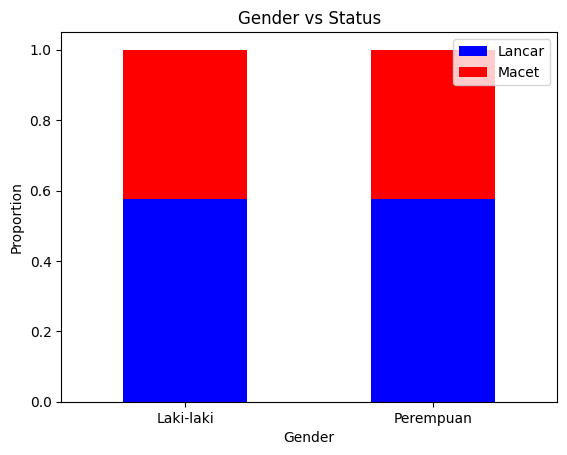

In [ ]:
pd.crosstab(data['Gender'],data['Status'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Gender vs Status')
plt.show()

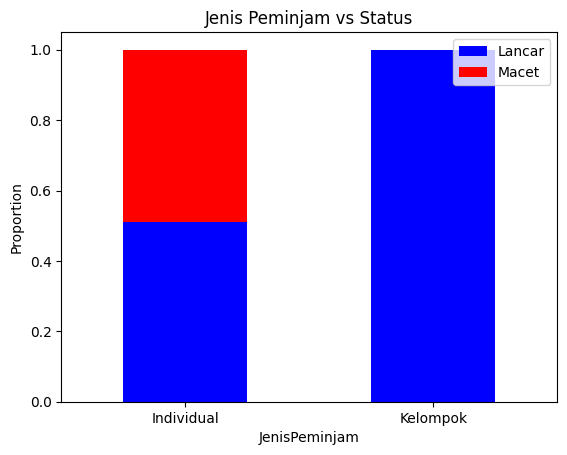

In [ ]:
pd.crosstab(data['JenisPeminjam'],data['Status'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Jenis Peminjam vs Status')
plt.show()

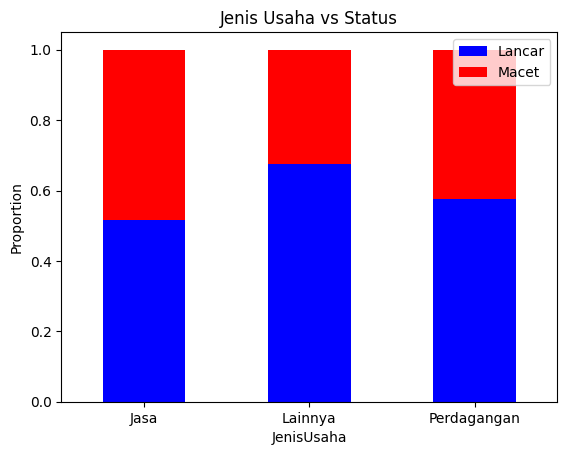

In [ ]:
pd.crosstab(data['JenisUsaha'],data['Status'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Jenis Usaha vs Status')
plt.show()

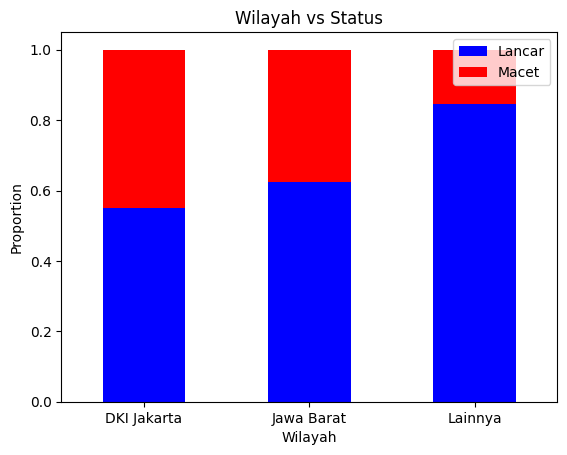

In [ ]:
pd.crosstab(data['Wilayah'],data['Status'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Wilayah vs Status')
plt.show()

In [ ]:
# Transformasi Data
data2 = pd.get_dummies(data, columns = ['Gender','JenisPeminjam','Wilayah','JenisUsaha'], drop_first = True)
data2.head()

,ID,Usia,Pinjaman,AsetUsaha,omsetperbulan,Status,Gender_Perempuan,JenisPeminjam_Kelompok,Wilayah_Jawa Barat,Wilayah_Lainnya,JenisUsaha_Lainnya,JenisUsaha_Perdagangan
0,A01001,48,20000000,12000000,18000000,Lancar,0,0,0,0,0,1
1,A01002,54,15000000,11000000,15000000,Lancar,1,0,0,0,0,1
2,A01003,43,25000000,40500000,45000000,Lancar,0,1,0,0,0,1
3,A01004,51,10000000,22500000,30000000,Lancar,0,0,0,0,0,1
4,A01005,23,30000000,6000000,12500000,Lancar,1,1,0,1,0,1


In [ ]:
X = data2.iloc[:, [col for col in range(1, 12) if col not in [0, 5]]]
X.head()

,Usia,Pinjaman,AsetUsaha,omsetperbulan,Gender_Perempuan,JenisPeminjam_Kelompok,Wilayah_Jawa Barat,Wilayah_Lainnya,JenisUsaha_Lainnya,JenisUsaha_Perdagangan
0,48,20000000,12000000,18000000,0,0,0,0,0,1
1,54,15000000,11000000,15000000,1,0,0,0,0,1
2,43,25000000,40500000,45000000,0,1,0,0,0,1
3,51,10000000,22500000,30000000,0,0,0,0,0,1
4,23,30000000,6000000,12500000,1,1,0,1,0,1


In [ ]:
Y = data2.iloc[:, 5]
Y

0      Lancar
1      Lancar
2      Lancar
3      Lancar
4      Lancar
        ...  
516    Lancar
517    Lancar
518    Lancar
519    Lancar
520     Macet
Name: Status, Length: 521, dtype: object

In [ ]:
# Membagi Data menjadi 70% Training dan 30% Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 224 to 392
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Usia                    157 non-null    int64
 1   Pinjaman                157 non-null    int64
 2   AsetUsaha               157 non-null    int64
 3   omsetperbulan           157 non-null    int64
 4   Gender_Perempuan        157 non-null    uint8
 5   JenisPeminjam_Kelompok  157 non-null    uint8
 6   Wilayah_Jawa Barat      157 non-null    uint8
 7   Wilayah_Lainnya         157 non-null    uint8
 8   JenisUsaha_Lainnya      157 non-null    uint8
 9   JenisUsaha_Perdagangan  157 non-null    uint8
dtypes: int64(4), uint8(6)
memory usage: 7.1 KB


# **Desicion Tree**

In [ ]:
# Pemodelan Pohon Keputusan
modeltree = DecisionTreeClassifier(criterion = 'gini', random_state = 5, max_depth= None, min_samples_leaf = 16)
modeltree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=16, random_state=5)

[Text(0.7569444444444444, 0.9444444444444444, 'JenisPeminjam_Kelompok <= 0.5\ngini = 0.487\nsamples = 364\nvalue = [211, 153]\nclass = Macet'),
 Text(0.7013888888888888, 0.8333333333333334, 'omsetperbulan <= 28500000.0\ngini = 0.499\nsamples = 316\nvalue = [163, 153]\nclass = Macet'),
 Text(0.5138888888888888, 0.7222222222222222, 'Pinjaman <= 17500000.0\ngini = 0.488\nsamples = 261\nvalue = [151, 110]\nclass = Macet'),
 Text(0.3055555555555556, 0.6111111111111112, 'Usia <= 38.5\ngini = 0.5\nsamples = 203\nvalue = [99, 104]\nclass = Lancar'),
 Text(0.1111111111111111, 0.5, 'Usia <= 29.5\ngini = 0.438\nsamples = 71\nvalue = [48, 23]\nclass = Macet'),
 Text(0.05555555555555555, 0.3888888888888889, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]\nclass = Macet'),
 Text(0.16666666666666666, 0.3888888888888889, 'Gender_Perempuan <= 0.5\ngini = 0.478\nsamples = 53\nvalue = [32, 21]\nclass = Macet'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.444\nsamples = 27\nvalue = [18, 9]\nclass

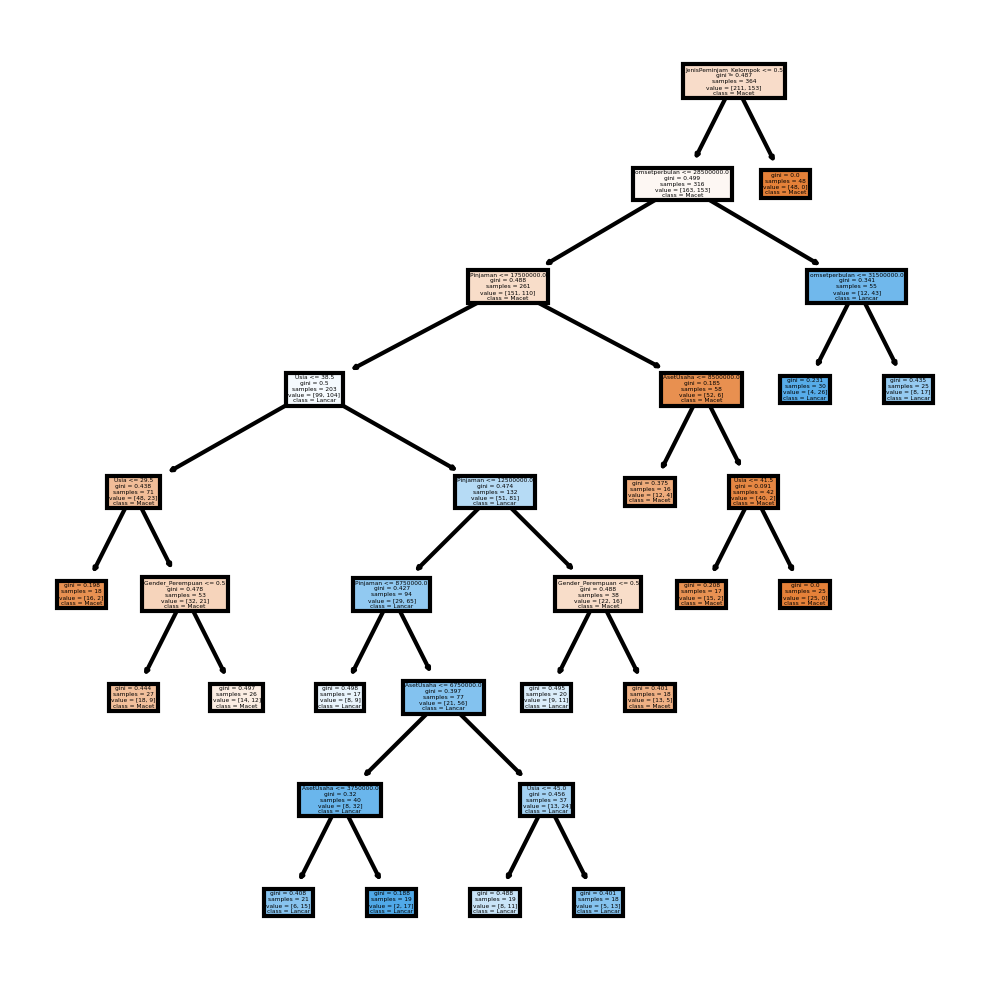

In [ ]:
# Visualisasi Aturan-Aturan Pohon Keputusan
fn = ['Usia','Pinjaman','AsetUsaha','omsetperbulan','Gender_Perempuan','JenisPeminjam_Kelompok','Wilayah_Jawa Barat','Wilayah_Lainnya','JenisUsaha_Lainnya','JenisUsaha_Perdagangan']
cn = ['Macet', 'Lancar']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(modeltree, feature_names = fn, class_names = cn, filled = True)

In [ ]:
# Pembentukan Feature Importance
feature_importance = modeltree.feature_importances_

# Menampilkan Feature Importance untuk Setiap Fitur
for i, importance in enumerate(feature_importance):
    print(f"Fitur {fn[i]}: {importance}")

Fitur Usia: 0.1573324631441208
Fitur Pinjaman: 0.2989966702793885
Fitur AsetUsaha: 0.03682371802455684
Fitur omsetperbulan: 0.18934949066871756
Fitur Gender_Perempuan: 0.027321100568345826
Fitur JenisPeminjam_Kelompok: 0.2901765573148705
Fitur Wilayah_Jawa Barat: 0.0
Fitur Wilayah_Lainnya: 0.0
Fitur JenisUsaha_Lainnya: 0.0
Fitur JenisUsaha_Perdagangan: 0.0


In [ ]:
# Menghitung Nilai Akurasi Model Pohon Keputusan
Y_predtree = modeltree.predict(X_test)
print("Accuracy :",metrics.accuracy_score(Y_test, Y_predtree))

Accuracy : 0.732484076433121


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
random_forest_model = RandomForestClassifier(n_estimators=16, random_state=12345)

# Melatih model pada data latih
random_forest_model.fit(X_train, Y_train)

# Melakukan prediksi pada data uji
predictions_rf = random_forest_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(Y_test, predictions_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.802547770700637


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Membuat model GBM
GradientBoosting_model = GradientBoostingClassifier(n_estimators=25, random_state=12345)

# Melatih model pada data pelatihan
GradientBoosting_model.fit(X_train, Y_train)

# Melakukan prediksi pada data uji
predictions_gbm = GradientBoosting_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(Y_test, predictions_gbm)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7898089171974523


# **Bagging**

In [ ]:
model_bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=625, random_state=1234)
model_bag.fit(X_train, Y_train)
predictions_bag = model_bag.predict(X_test)
accuracy = accuracy_score(Y_test, predictions_bag)
print(f'Accuracy: {accuracy}')

Accuracy: 0.821656050955414


# **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat model AdaBoost dengan DecisionTreeClassifier sebagai base estimator
base_estimator = DecisionTreeClassifier(max_depth=16)
AdaBoost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=625, random_state=1234)

# Melatih model pada data pelatihan
AdaBoost_model.fit(X_train, Y_train)

# Melakukan prediksi pada data uji
predictions_adaboost = AdaBoost_model.predict(X_test)

# Mengukur akurasi
accuracy_adaboost = accuracy_score(Y_test, predictions_adaboost)
print(f'Accuracy (AdaBoost): {accuracy_adaboost}')


Accuracy (AdaBoost): 0.7579617834394905


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Menghitung Nilai Sensitivitas dan Spesifisitas
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Menampilkan Nilai Sensitivitas dan Spesifisitas
print(f"--------------------------------")
print(f"Sensitivity : {sensitivity}")
print(f"Specificity : {specificity}")
print(f"--------------------------------")
print(f"                                ")

# Hasil Laporan Klasifikasi
print("Classification Report :")
print(classification_report(Y_test, predictions_bag))

--------------------------------
Sensitivity : 0.6911764705882353
Specificity : 0.7640449438202247
--------------------------------
                                
Classification Report :
              precision    recall  f1-score   support

      Lancar       0.85      0.83      0.84        89
       Macet       0.79      0.81      0.80        68

    accuracy                           0.82       157
   macro avg       0.82      0.82      0.82       157
weighted avg       0.82      0.82      0.82       157

